In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
def f(y,t):
    return t + 2*y

In [4]:
def exact_f(t):
    return -0.5*t - (1 - np.exp(2*t))/4

Tmin, Tmax, Npoints = 0, 1, 5
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax - Tmin)/float(Npoints - 1)
yexacta = np.zeros(Npoints)
yexacta = exact_f(t)

# Runge-Kutta de 3 orden
$$ y(t_{n+1}) \approx y(t_{n}) + \frac{h}{6}(k_{1}+4k_{2}+k_{3})  $$$$ k_{1} = f(y_{n},t_{n}) $$$$ k_{2} = f(y_{n} + \frac{1}{2}k_{1}h, t_{n}+\frac{h}{2}) $$
$$ k_{3} = f(y_{n} - k_{1}h + 2k_{2}h, t_{n}+h) $$

In [5]:
def GetRunge3(y,t,deltat):
    print('Corriendo método de Runge 3')
    for i in range(1,Npoints):
        k1 = f(y[i-1], t[i-1])
        k2 = f(y[i-1] + 0.5*k1*deltat, t[i-1]+0.5*deltat)
        k3 = f(y[i-1] - k1*deltat + 2.*k2*deltat, t[i-1]+deltat )
        y[i] = y[i-1] + deltat*(k1 + 4.*k2 + k3)/6.

In [6]:
y2 = np.zeros(Npoints)
y2[0] = 0.
GetRunge3(y2,t,deltat)

Corriendo método de Runge 3


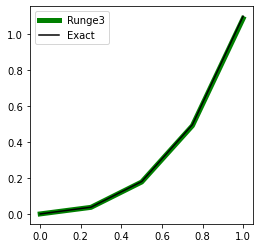

In [13]:
plt.figure(figsize=(4,4))
plt.plot(t,y2, c='g',label='Runge3', linewidth=5)
plt.plot(t,yexacta, c='k',label='Exact')
plt.legend(loc=0)
plt.show()

# Implementemos Runge-Kutta de orden 4

In [8]:
def GetRunge4(y,t,deltat):
    print('Corriendo método de Runge 4')
    for i in range(1,Npoints):
        k1 = f(y[i-1], t[i-1])
        k2 = f(y[i-1] + 0.5*k1*deltat, t[i-1]+0.5*deltat)
        k3 = f(y[i-1] + 0.5*k2*deltat, t[i-1]+0.5*deltat)
        k4 = f(y[i-1] + k3*deltat, t[i-1]+deltat)
        y[i] = y[i-1] + deltat*(k1 + 2.*k2 + 2.*k3+k4)/6.

In [9]:
y4 = np.zeros(Npoints)
y4[0] = 0.
GetRunge4(y4,t,deltat)

Corriendo método de Runge 4


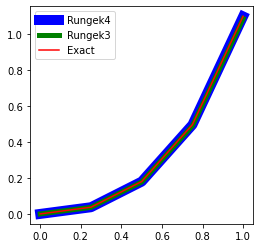

In [17]:
plt.figure(figsize=(4,4))
plt.plot(t,y4, c='b',label='Rungek4', linewidth=10)
plt.plot(t,y2, c='g',label='Rungek3', linewidth=5)
plt.plot(t,yexacta, c='r',label='Exact')
plt.legend(loc=0)
#plt.yscale('log')
plt.show()

# Comparación del error local

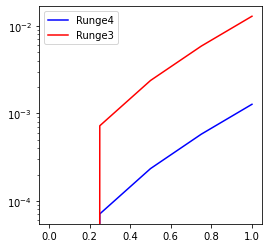

In [19]:
plt.figure(figsize=(4,4))
plt.plot(t,np.abs(yexacta-y4), c='b',label='Runge4')
plt.plot(t,np.abs(yexacta-y2), c='r',label='Runge3')
plt.legend(loc=0)
plt.yscale('log')
plt.show()

# Estudiemos la estabilidad del método Runge-Kutta 4

In [20]:
def fc(z):
    return 1.j*z

def ComplexRungekutta():
    global t
    global deltat
    global z
    k1 = fc(z)
    k2 = fc(z + 0.5*k1*deltat)
    k3 = fc(z + 0.5*k2*deltat)
    k4 = fc(z + k3*deltat)
    z+= deltat*(k1 + 2.*k2 + 2.*k3 + k4)/6.
    t+=deltat

[6.28318531+0.j         0.99591992-0.00701331j]


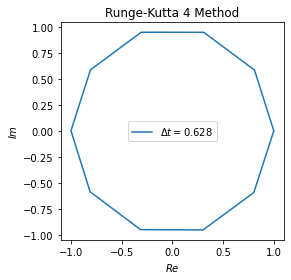

In [22]:
t = 0.
TMax = 2*np.pi

z = 1.
Npoints = 10

deltat = TMax/np.int(Npoints)

data=[[t,z]] # El tiempo 0

for i in range(Npoints):
    ComplexRungekutta()
    data.append([t,z])

data = np.array(data)
    
print(data[-1])   

plt.figure(figsize=(4,4))
plt.subplot(111)
plt.title("Runge-Kutta 4 Method")
plt.plot(np.real(data[:,1]),np.imag(data[:,1]), label=r'$\Delta t = %.3f$' %(deltat) )
plt.ylabel(r'$Im$')
plt.xlabel(r'$Re$')
plt.legend()

# Multistep methods
## Métodos de Adams
1. Necesitamos un método inicializador (RK4) para usar los métodos de Adams.
2. Predictor: Adams-Bashforth
3. Corrector: Adams-Moulton

In [24]:
# Implementemos el método para inicializar los metodos multipaso
def GetRungeA4(y,t,deltat, Npoints):
    print('Corriendo método de Runge-Kutta 4 para inicializar adams')
    for i in range(1,Npoints): # Esto debe corresponder con el número de puntos para inicializar adams
        k1 = f(y[i-1], t[i-1])
        k2 = f(y[i-1] + 0.5*k1*deltat, t[i-1]+0.5*deltat)
        k3 = f(y[i-1] + 0.5*k2*deltat, t[i-1]+0.5*deltat)
        k4 = f(y[i-1] + k3*deltat, t[i-1]+deltat)
        y[i] = y[i-1] + deltat*(k1 + 2.*k2 + 2.*k3+k4)/6.

In [26]:
def f(y, t):
    return 40. - 0.2*y

def exac_f(t):
    return 200. - 175.*np.exp(-0.2*t)

In [27]:
Tmin, Tmax, Npoints = 0.,10., 21
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)
print(deltat)
yexact = exac_f(t)

0.5


In [28]:
y = np.zeros(Npoints)
y[0] = 25. 

yr = np.zeros(Npoints)
yr[0] = 25.

In [29]:
GetRungeA4(y,t,deltat,4) # Orden de adams que debemos implementar
GetRunge4(yr,t,deltat)

print(y)

yp = y.copy()

Corriendo método de Runge-Kutta 4 para inicializar adams
Corriendo método de Runge 4
[25.         41.6534375  56.72209225 70.35677615  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


In [30]:
def GetAdamsBashforth(y,t,deltat, orden):
    print('Corriendo Adam\'s methods')
    for i in range(orden,Npoints):
        # Adams bashforth // predictor explíctio
        y[i] = y[i-1] + deltat*(55.*f(y[i-1],t[i-1])-59.*f(y[i-2],t[i-2])+37.*f(y[i-3],t[i-3])-9.*f(y[i-4],t[i-4]))/24.
        yp[i] = y[i]
        # Adams Moulton // Corrector implícito
        y[i] = y[i-1] + deltat*(251.*f(y[i],t[i])+646.*f(y[i-1],t[i-1])- 264.*f(y[i-2],t[i-2])+ 106.*f(y[i-3],t[i-3])-19.*f(y[i-4],t[i-4]))/720.

In [31]:
## (función,variable independiente, paso temporal, orden del método)
GetAdamsBashforth(y,t,deltat,4)

Corriendo Adam's methods


In [32]:
for i in range(Npoints):
    print(yexact[i], y[i], yp[i])

25.0 25.0 25.0
41.653451843707074 41.653437499999995 41.653437499999995
56.72211821135318 56.72209225390625 56.72209225390625
70.35681138069938 70.35677614979389 70.35677614979389
82.69399194376312 82.69397513723727 82.69345767996808
93.85713455028915 93.85713242982055 93.8566613222175
103.95796368354539 103.9579738416947 103.95755060565244
113.09757183650335 113.09759190788316 113.09720783059707
121.36743127948623 121.36745928924846 121.36711181645894
128.85030954539513 128.8503438000554 128.85002937834062
135.62109779499758 135.62113685246158 135.62085235441452
141.74756035283608 141.74760298878542 141.74734556407256
147.29101291536466 147.29105809502417 147.2908251675905
152.3069362190478 152.30698307217673 152.30677231073847
156.84553131021886 156.84557910917002 156.84538840435923
160.95222197402478 160.95227011448569 160.95209755765856
164.6681093509353 164.66815733504419 164.66800119918983
168.03038329077145 168.0304307123295 168.03028943478387
171.07269456122236 171.072741092756

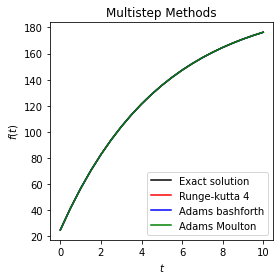

In [34]:
plt.figure(figsize=(4,4))
plt.subplot(111)
plt.title("Multistep Methods")
plt.plot(t,yexact,c='k',label='Exact solution')
plt.plot(t,yexact,c='r',label='Runge-kutta 4')
plt.plot(t,y,c='b',label='Adams bashforth')
plt.plot(t,yp,c='g',label='Adams Moulton')
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')
plt.legend()

# Comparando la solución exacta y la aproximación para un paso y multiples pasos.

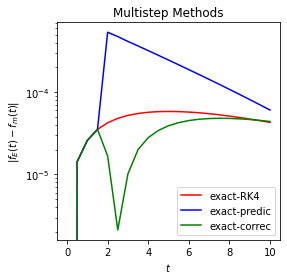

In [36]:
plt.figure(figsize=(4,4))
plt.subplot(111)
plt.title("Multistep Methods")
plt.plot(t,np.abs(yexact-yr),c='r',label='exact-RK4')
plt.plot(t,np.abs(yexact-yp),c='b',label='exact-predic')
plt.plot(t,np.abs(yexact-y),c='g',label='exact-correc')
plt.xlabel(r'$t$')
plt.ylabel(r'$|f_{E}(t)-f_{m}(t)|$')
plt.legend()
plt.yscale('log')